Точечный график северных городов


<Axes: xlabel='hardness', ylabel='mortality'>

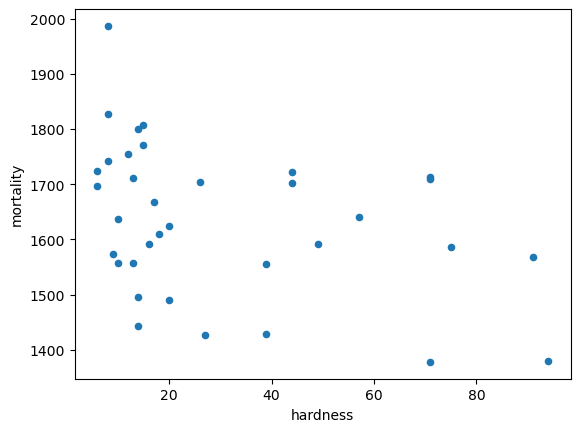

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

url = 'https://raw.githubusercontent.com/Shevchenko-AV/python_basics/main/water.csv'
df = pd.DataFrame()
try:
    df = pd.read_csv(url)
except:
    pass
finally:
    if df.empty:
        df = pd.read_csv('water.csv')
        
north = df.loc[df['location'] == 'North']
print('Точечный график северных городов')
north.plot(kind='scatter', x='hardness', y='mortality')

In [2]:
print('Коэффициент корреляции Пирсона северных городов')
north[['hardness', 'mortality']].corr()

Коэффициент корреляции Пирсона северных городов


,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [3]:
print('Коэффициент корреляции Спирмана северных городов')
north[['hardness', 'mortality']].corr(method='spearman')

Коэффициент корреляции Спирмана северных городов


,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [4]:
X = north[['hardness']]
y = north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     7.228
Date:                Fri, 21 Dec 2023   Prob (F-statistic):             0.0124
Time:                        23:23:31   Log-Likelihood:                -171.85
No. Observations:                  28   AIC:                             347.7
Df Residuals:                      26   BIC:                             350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1694.9053     34.641     48.927      0.0

Точечный график остатков северных городов


Text(0, 0.5, 'Остатки')

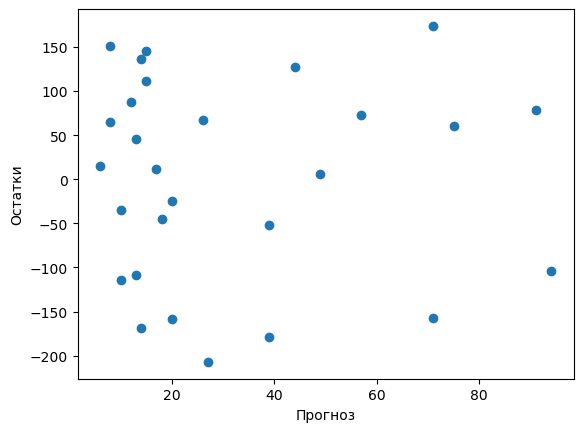

In [5]:
print('Точечный график остатков северных городов')
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

График остатков - гистограмма (северных городов)


(array([1., 1., 3., 0., 1., 2., 0., 0., 2., 2., 0., 3., 0., 1., 4., 2., 1.,
        1., 3., 1.]),
 array([-207.14480156, -188.09394602, -169.04309047, -149.99223493,
        -130.94137939, -111.89052384,  -92.8396683 ,  -73.78881276,
         -54.73795722,  -35.68710167,  -16.63624613,    2.41460941,
          21.46546496,   40.5163205 ,   59.56717604,   78.61803158,
          97.66888713,  116.71974267,  135.77059821,  154.82145376,
         173.8723093 ]),
 <BarContainer object of 20 artists>)

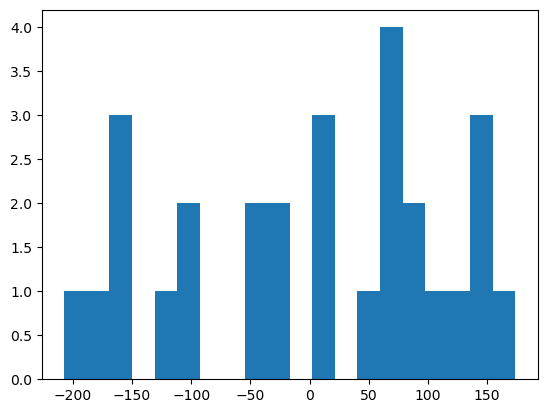

In [6]:
print('График остатков - гистограмма (северных городов)')
plt.hist(results.resid, bins=20)

In [ ]:
print('Взаимосвязь есть, но крайне слабая обратная линейная зависимость - чем выше жёсткость, тем ниже средняя годовая смертность')
print('Более корректный вывод в том, что связь скорее всего нелинейная и должны учитываться другие факторы. Например, города')

Точечный график южных городов


<Axes: xlabel='hardness', ylabel='mortality'>

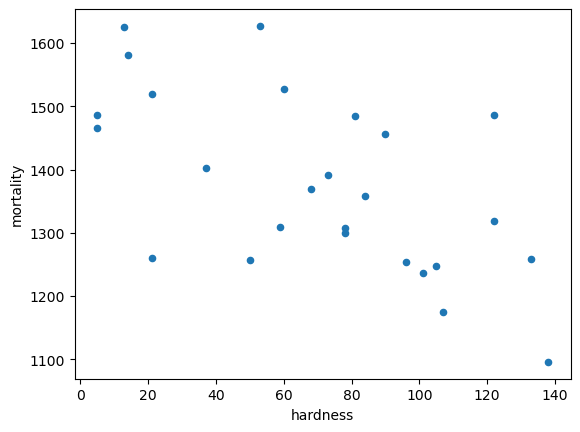

In [7]:
south = df.loc[df['location'] == 'South']
print('Точечный график южных городов')
south.plot(kind='scatter', x='hardness', y='mortality')

In [8]:
print('Коэффициент корреляции Пирсона южных городов')
south[['hardness', 'mortality']].corr()

Коэффициент корреляции Пирсона южных городов


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [9]:
print('Коэффициент корреляции Спирмана южных городов')
south[['hardness', 'mortality']].corr(method='spearman')

Коэффициент корреляции Спирмана южных городов


,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [10]:
X = south[['hardness']]
y = south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.41
Date:                Fri, 21 Dec 2023   Prob (F-statistic):           0.000106
Time:                        23:23:43   Log-Likelihood:                -119.64
No. Observations:                  20   AIC:                             243.3
Df Residuals:                      18   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4338     49.134     32.471      0.0

Точечный график остатков южных городов


Text(0, 0.5, 'Остатки')

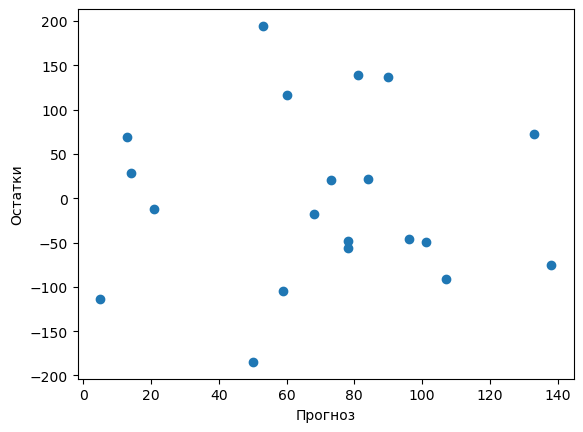

In [11]:
print('Точечный график остатков южных городов')
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

График остатков - гистограмма (южных городов)


(array([1., 0., 0., 1., 2., 1., 1., 3., 1., 1., 2., 1., 0., 2., 0., 1., 1.,
        1., 0., 1.]),
 array([-184.70069149, -165.7394923 , -146.77829311, -127.81709392,
        -108.85589473,  -89.89469554,  -70.93349635,  -51.97229716,
         -33.01109797,  -14.04989878,    4.91130041,   23.8724996 ,
          42.83369879,   61.79489798,   80.75609717,   99.71729636,
         118.67849555,  137.63969474,  156.60089393,  175.56209312,
         194.52329231]),
 <BarContainer object of 20 artists>)

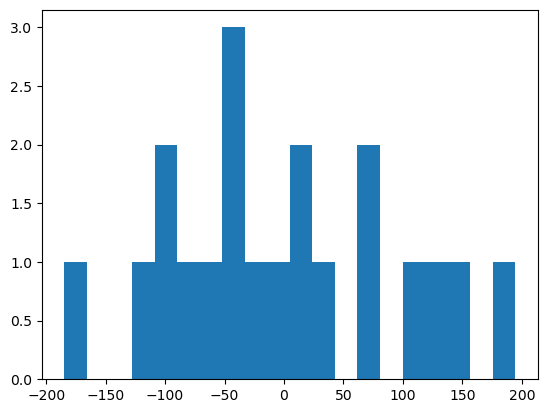

In [12]:
print('График остатков - гистограмма (южных городов)')
plt.hist(results.resid, bins=20)

In [13]:
print('Для северных городов ситуация схожа на общую картину:')
print('1. Коэффициент детерминации стремится к нулю, а не к единице')
print('2. В остатках есть резкие выбросы')
print('3. График гистограмма остатков отличается от графика нормального распределения')
print('Поэтому и вывод для северных городов прежний: взаимосвязи либо нет, либо она более сложная, чем обратно линейная')
print('\nДля южных городов уже что-то по-другому:')
print('1. Коэффициент детерминации стремится теперь к единице, а не к нулю')
print('2. В остатках всё ещё есть резкие выбросы')
print('3. НО(!) график гистограмма остатков уже гораздо ближе к графику нормального распределения, чем общий и тем более, чем у северных городов')
print('Из чего можно сделать вывод, что взаимосвязь для южных городов обратно линейная')

Для северных городов ситуация схожа на общую картину:
1. Коэффициент детерминации стремится к нулю, а не к единице
2. В остатках есть резкие выбросы
3. График гистограмма остатков отличается от графика нормального распределения
Поэтому и вывод для северных городов прежний: взаимосвязи либо нет, либо она более сложная, чем обратно линейная

Для южных городов уже что-то по-другому:
1. Коэффициент детерминации стремится теперь к единице, а не к нулю
2. В остатках всё ещё есть резкие выбросы
3. НО(!) график гистограмма остатков уже гораздо ближе к графику нормального распределения, чем общий и тем более, чем у северных городов
Из чего можно сделать вывод, что взаимосвязь для южных городов обратно линейная
